In [309]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

# Import Data

In [310]:
#Reading the dataset into a dataframe
df = pd.read_csv("RTA Dataset.csv")

In [311]:
#Displaying the first 5 rows of the dataset
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [312]:
#Displaying the last 5 rows of the dataset
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


# Exploratory Data Analysis

In [313]:
# Getting the overall info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [314]:
#Checking the shapes of the dataset
df.shape

(12316, 32)

In [315]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [316]:
# renaming the columns
renamed_columns = {
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

df.rename(columns=renamed_columns, inplace=True)

In [317]:
# converting 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

df['time'].dt.hour

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: time, Length: 12316, dtype: int64

In [318]:
# Getting the overall info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  object        
 2   driver_age               12316 non-null  object        
 3   driver_sex               12316 non-null  object        
 4   educational_level        11575 non-null  object        
 5   vehicle_driver_relation  11737 non-null  object        
 6   driving_experience       11487 non-null  object        
 7   vehicle_type             11366 non-null  object        
 8   vehicle_owner            11834 non-null  object        
 9   service_year             8388 non-null   object        
 10  vehicle_defect           7889 non-null   object        
 11  accident_area            12077 non-null  object        
 12  lanes                    11931 n

In [319]:
# descriptive summary of string columns
df.describe(include='object')

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
count,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,13,4,3,6,4,7,5,9,20,3
top,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [320]:
# descriptive summary of numeric columns
df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [321]:
# checking for null values

df.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [322]:
# check for duplicate columns
print("Number of duplicate rows:", df.duplicated().sum())
print("Unqiue values per column:")
df.nunique()

Number of duplicate rows: 0
Unqiue values per column:


time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [323]:
# extracting hour and minute from time column

df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

In [324]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


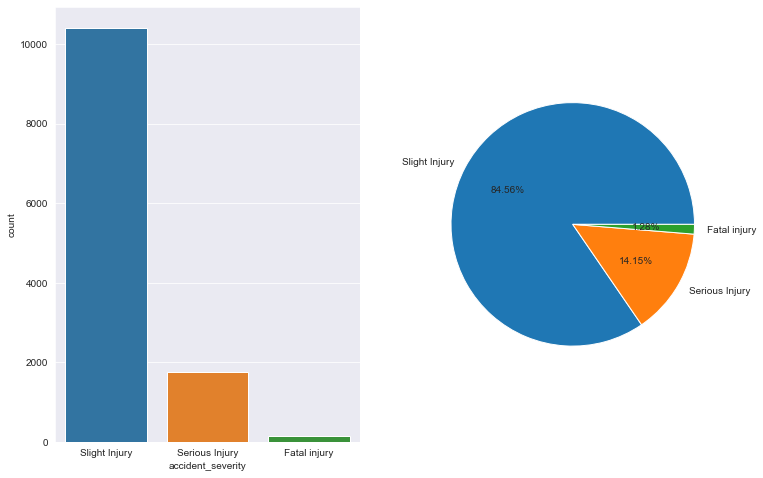

In [325]:
# checking the target variable - accident severity for class imbalance

plt.figure(figsize=(12,8))

# bar plot

ax1 = plt.subplot(1,2,1)
countplot = sns.countplot(x=df['accident_severity'])

ax2 = plt.subplot(1,2,2)
plt.pie(x=df['accident_severity'].value_counts(), labels= list(df['accident_severity'].unique()), autopct='%1.2f%%')

plt.show()

In [326]:
# Univariate analysis on numeric columns
def univariate_analysis(column,nbins):
    print('\033[1m'+ "Description of " + column + '\033[0m' + '\n' )
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

Description of vehicles_involved

count    12316.000000
mean         2.040679
std          0.688790
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: vehicles_involved, dtype: float64
----------------------------------------------------------------------------
Distribution of vehicles_involved



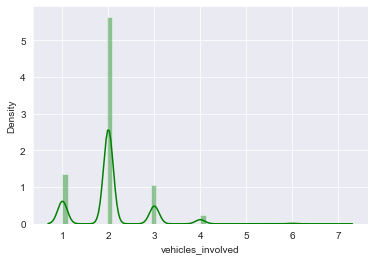

----------------------------------------------------------------------------
BoxPlot of vehicles_involved



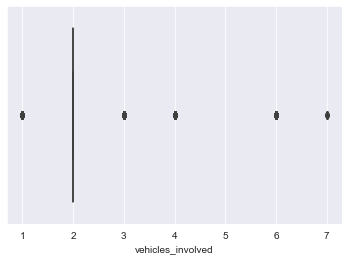

----------------------------------------------------------------------------
Description of casualties

count    12316.000000
mean         1.548149
std          1.007179
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: casualties, dtype: float64
----------------------------------------------------------------------------
Distribution of casualties



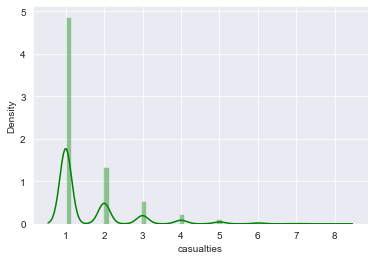

----------------------------------------------------------------------------
BoxPlot of casualties



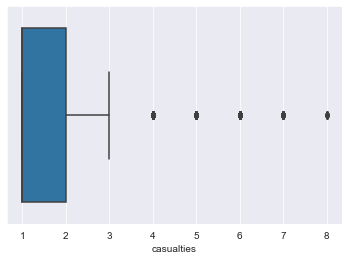

----------------------------------------------------------------------------
Description of hour

count    12316.000000
mean        13.835823
std          5.202923
min          0.000000
25%         10.000000
50%         15.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64
----------------------------------------------------------------------------
Distribution of hour



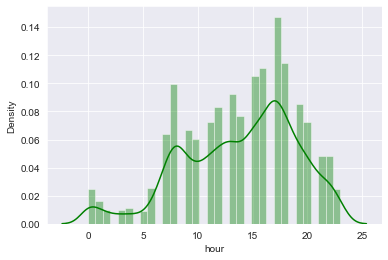

----------------------------------------------------------------------------
BoxPlot of hour



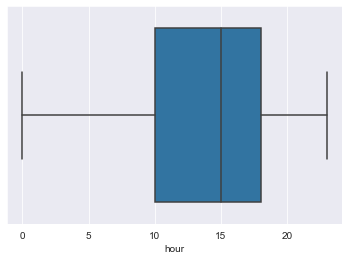

----------------------------------------------------------------------------
Description of minute

count    12316.000000
mean        27.696736
std         17.482604
min          0.000000
25%         12.000000
50%         30.000000
75%         43.000000
max         59.000000
Name: minute, dtype: float64
----------------------------------------------------------------------------
Distribution of minute



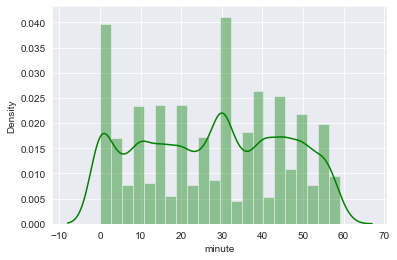

----------------------------------------------------------------------------
BoxPlot of minute



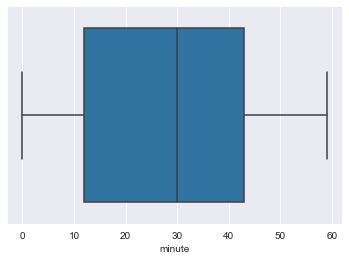

----------------------------------------------------------------------------


In [327]:
for column in list(df.select_dtypes(exclude='object').columns):
    univariate_analysis(column,20)

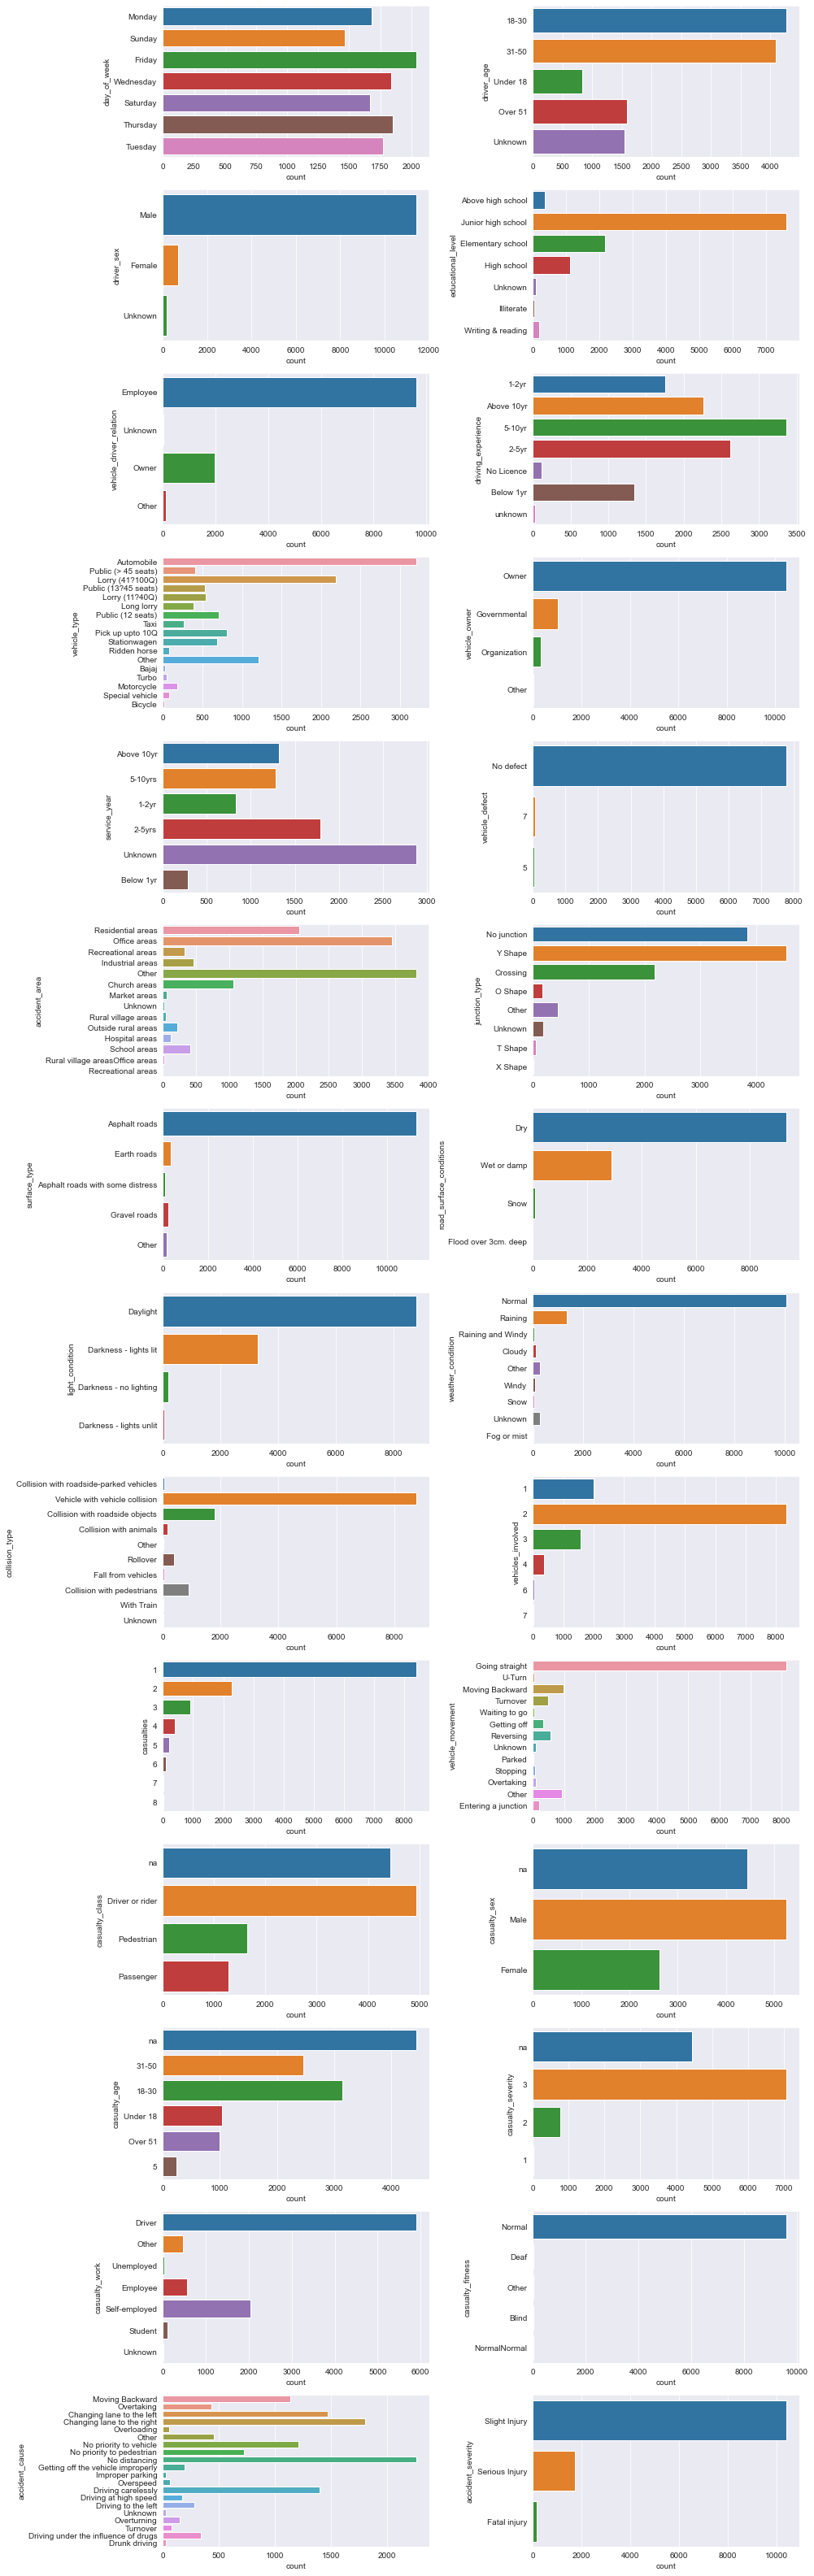

In [328]:
# Count plot of all object columns

plt.figure(figsize=(14,50))
plotnumber = 1

for column in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement' ], axis=1):
    if plotnumber <=df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=column)
    plotnumber +=1
plt.tight_layout()
        


<AxesSubplot:xlabel='count', ylabel='lanes'>

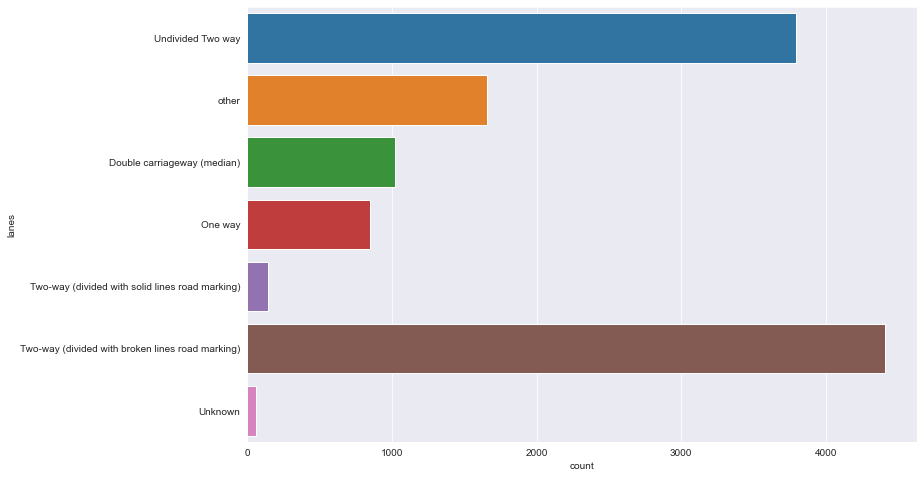

In [329]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='lanes')

<AxesSubplot:xlabel='count', ylabel='road_allignment'>

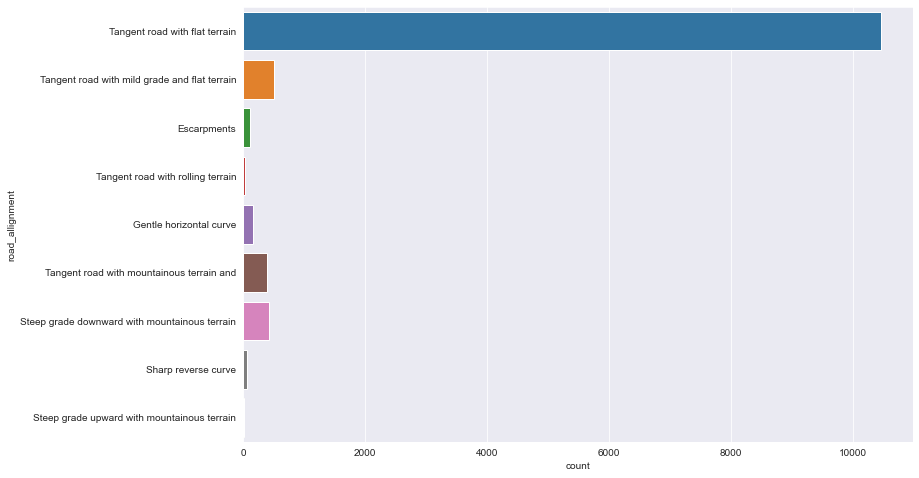

In [330]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='road_allignment')

<AxesSubplot:xlabel='count', ylabel='hour'>

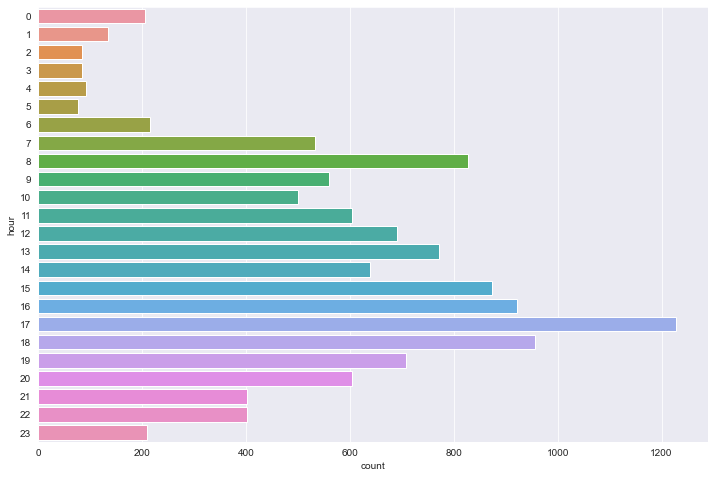

In [331]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='hour')

<AxesSubplot:xlabel='count', ylabel='minute'>

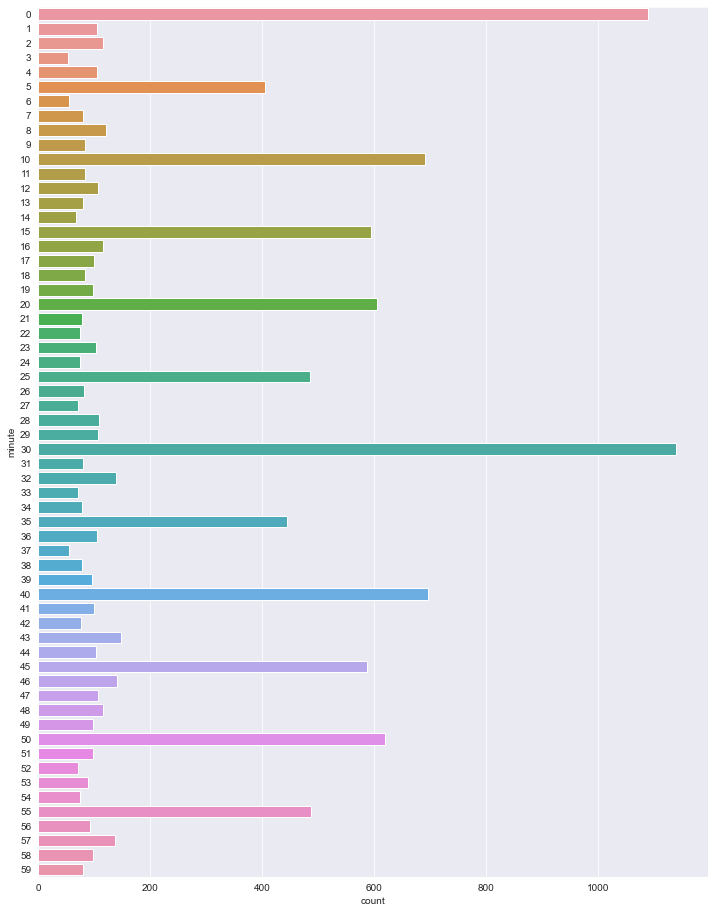

In [332]:
plt.figure(figsize=(12,16))
sns.countplot(data=df, y='minute')

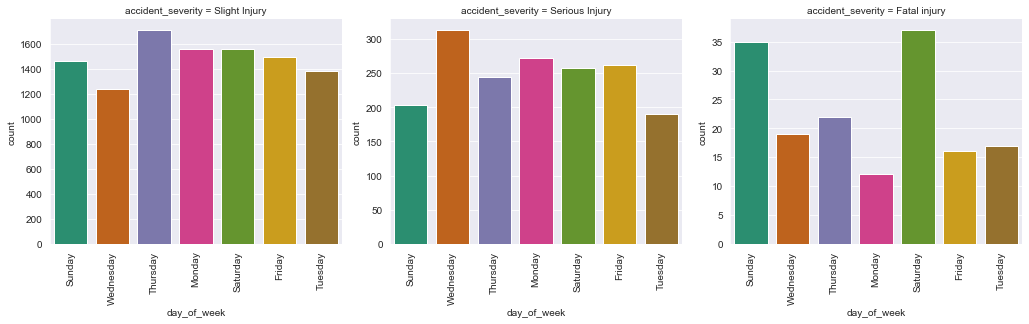

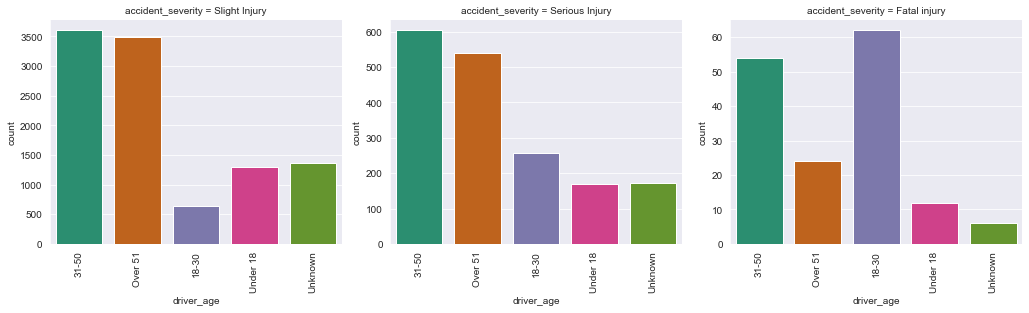

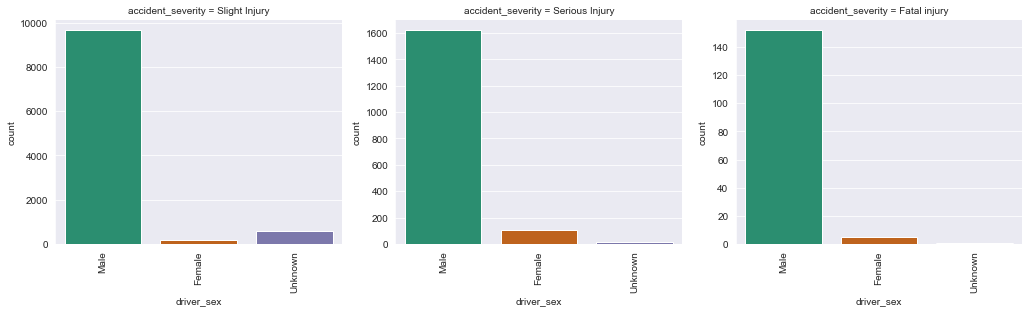

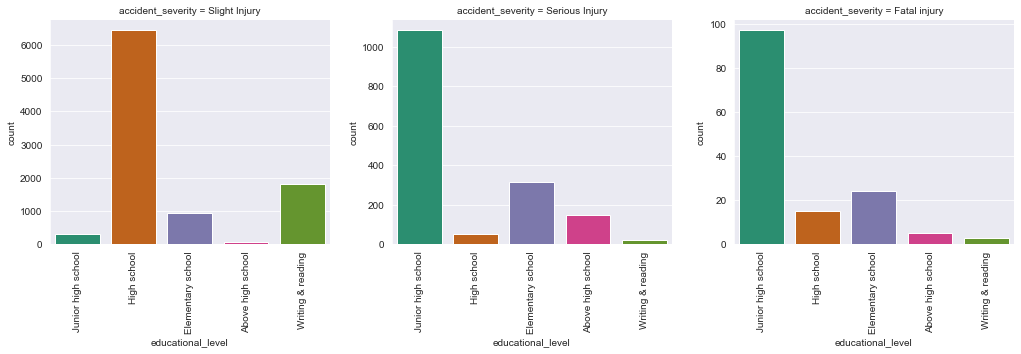

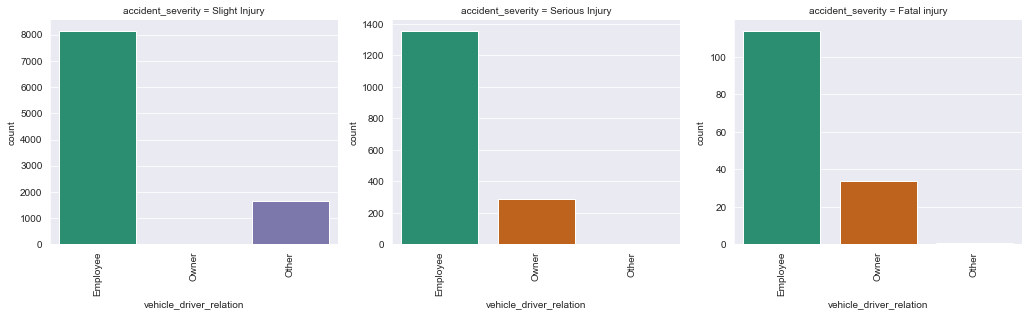

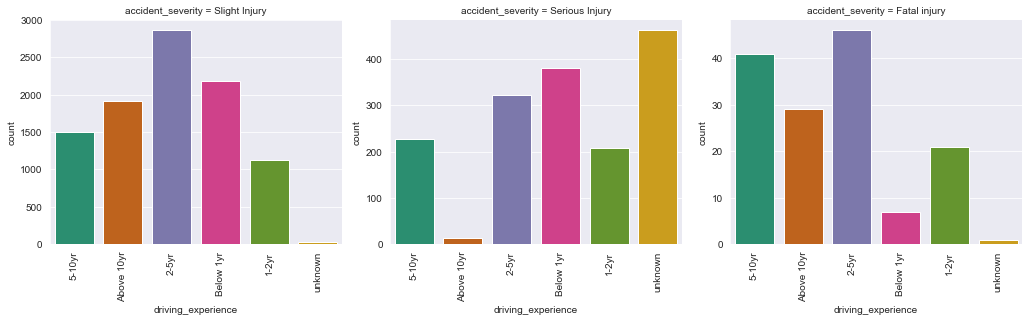

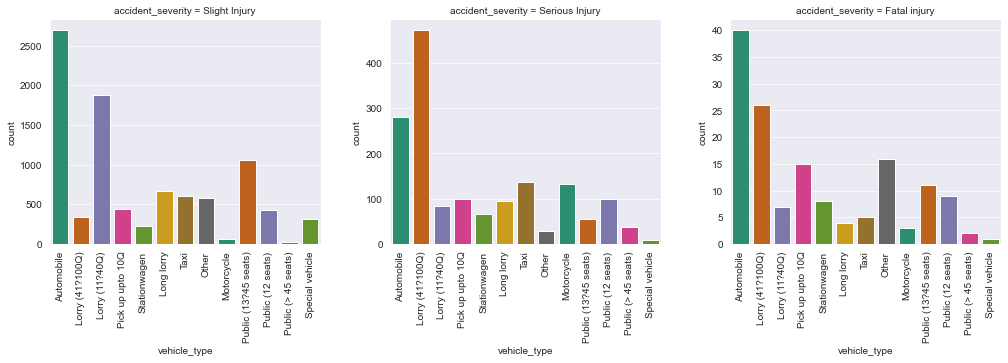

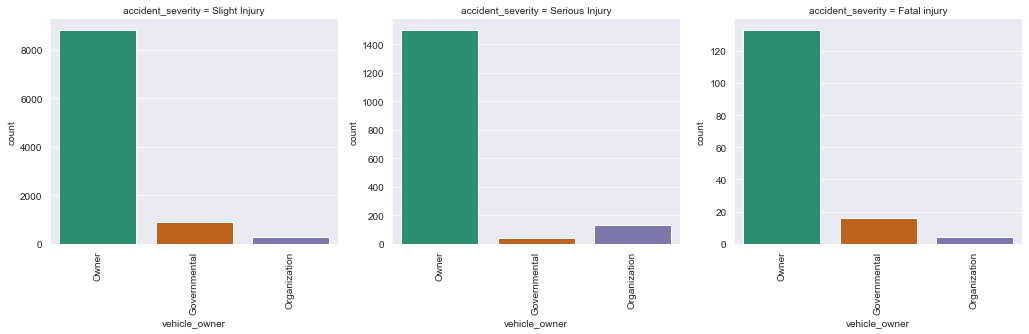

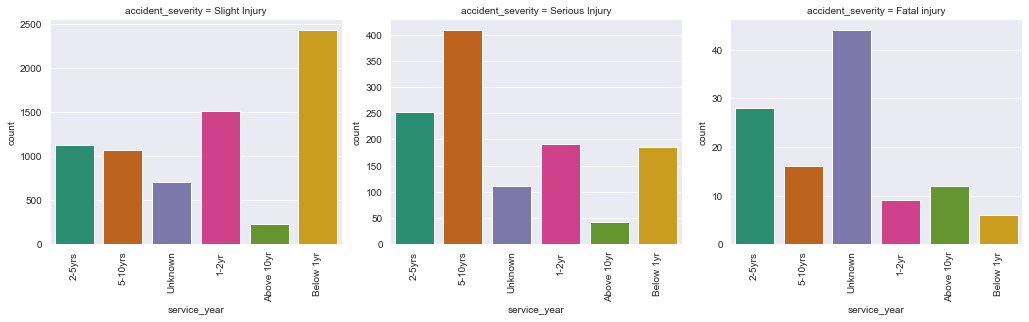

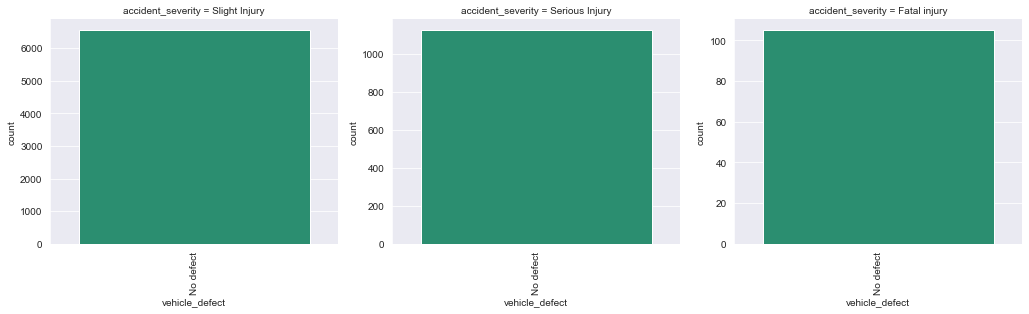

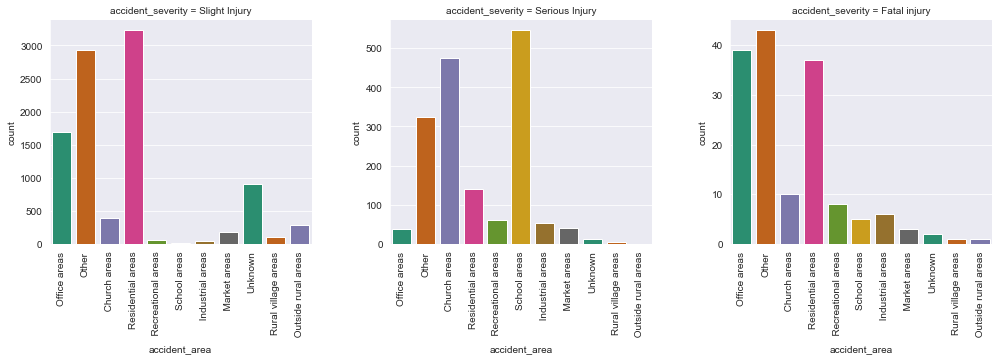

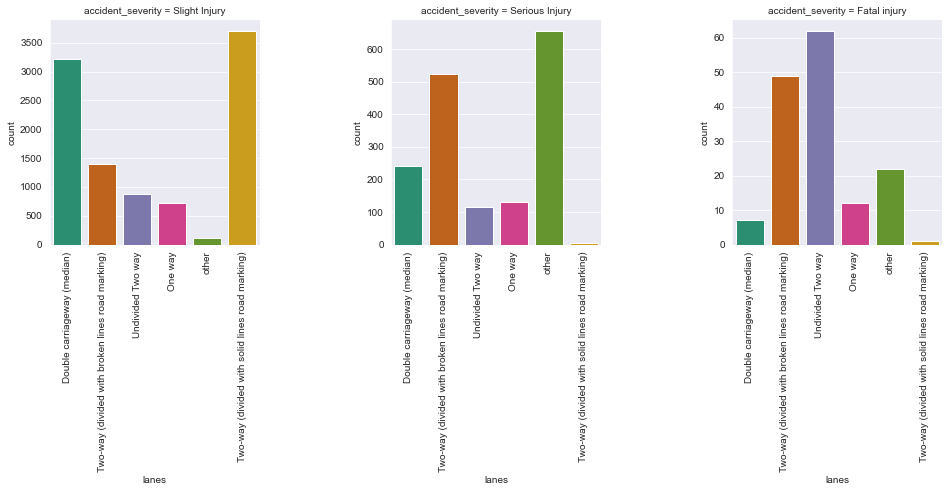

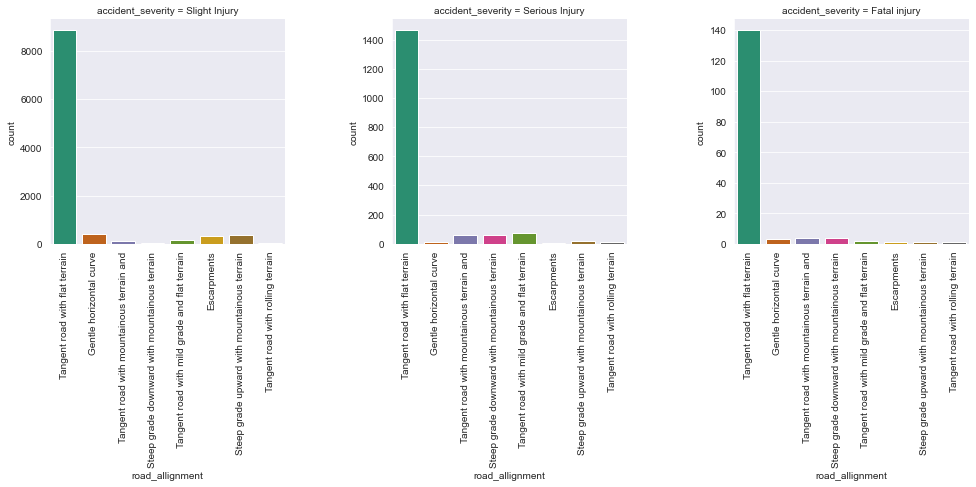

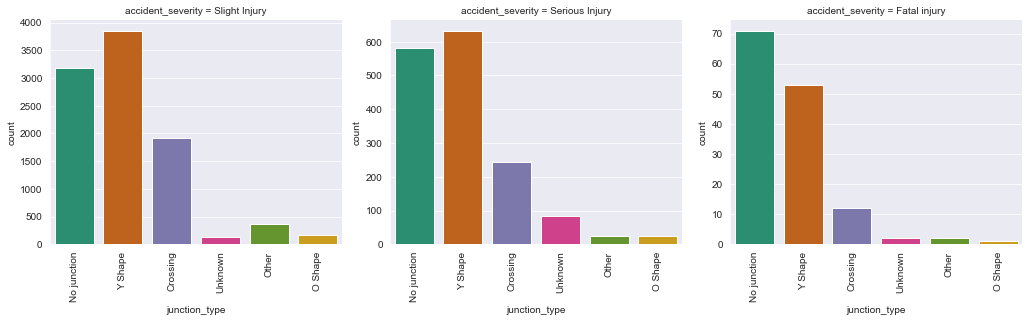

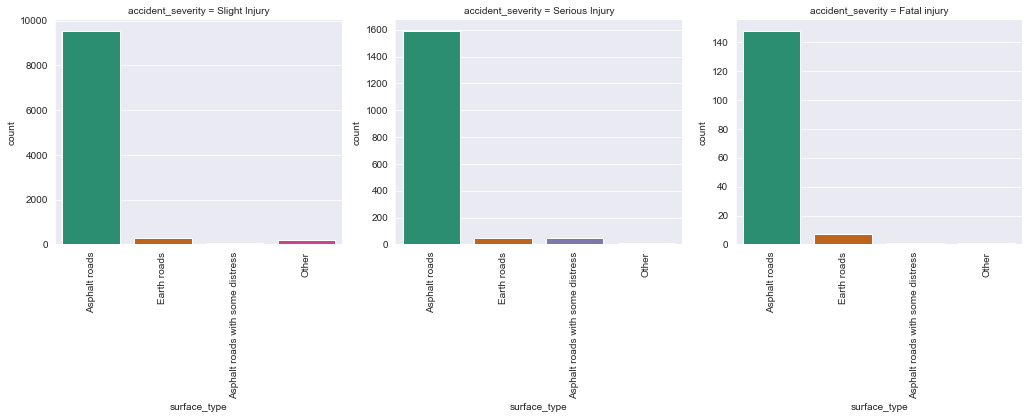

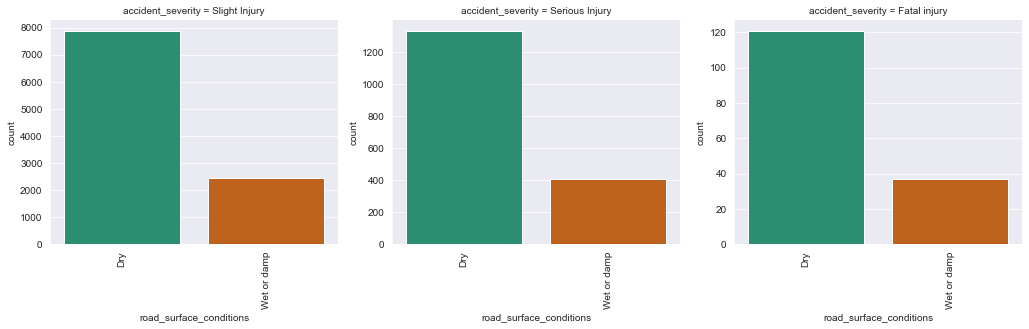

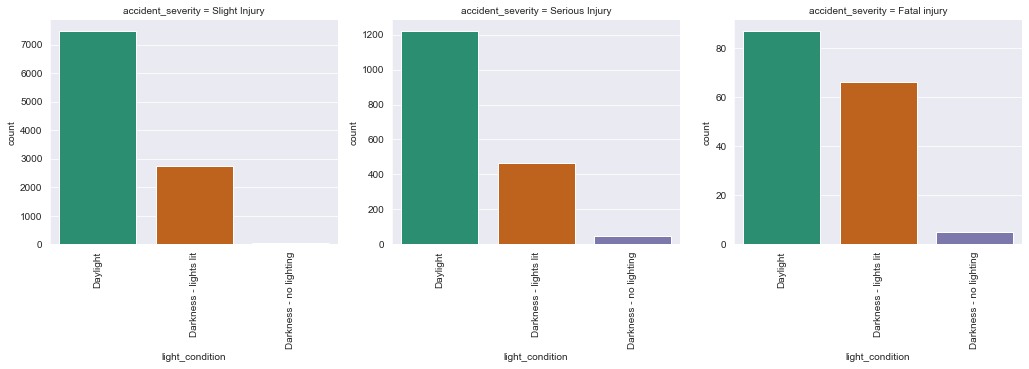

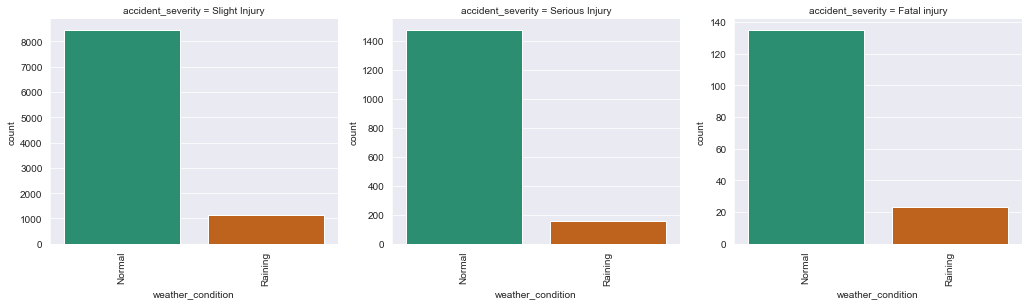

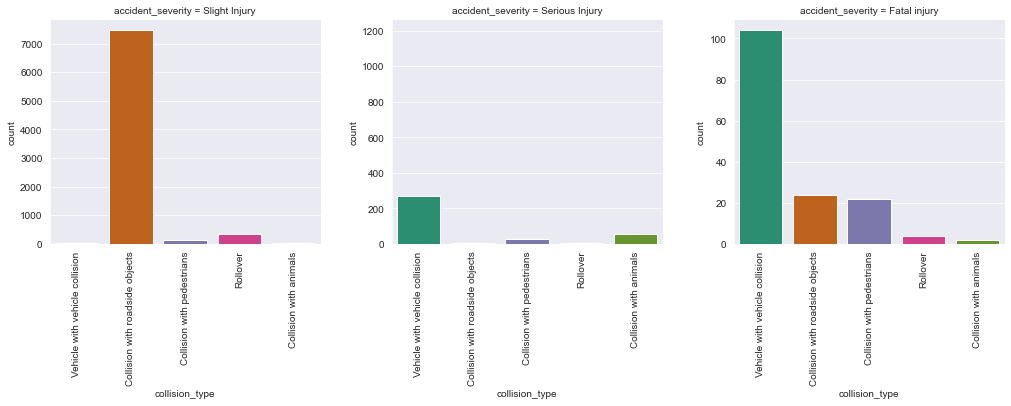

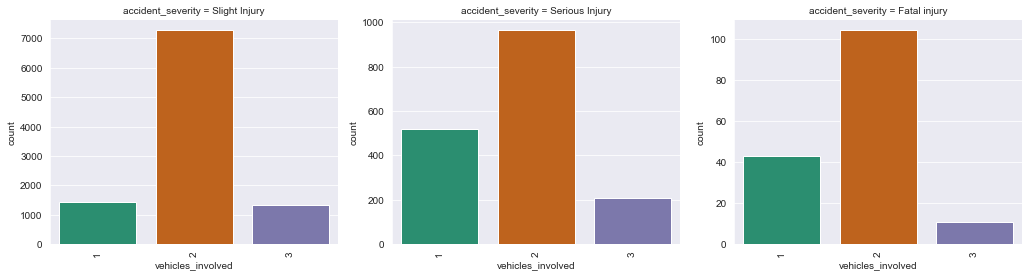

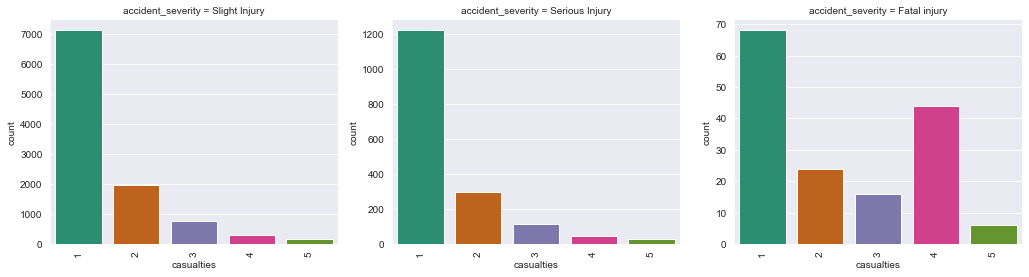

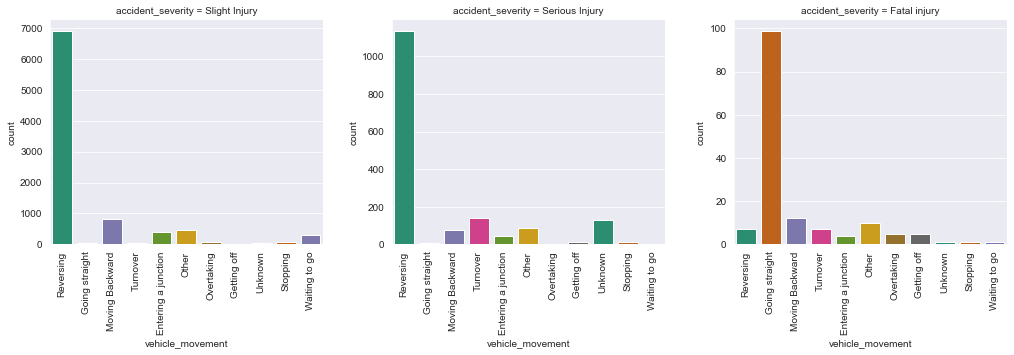

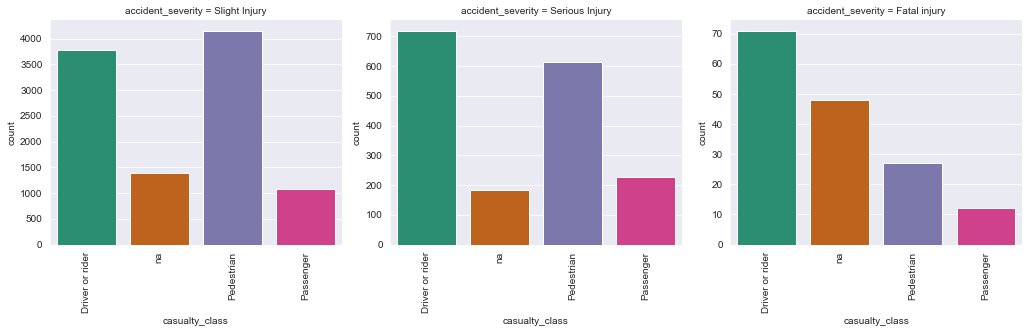

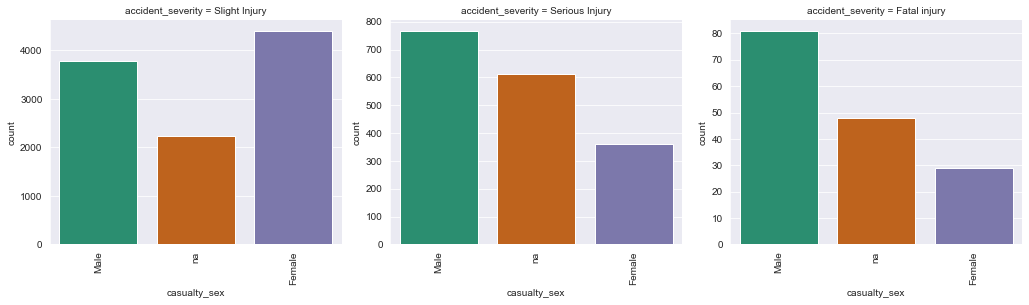

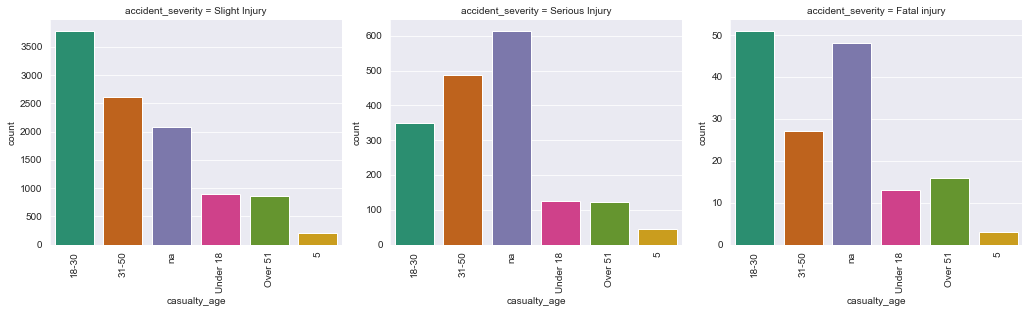

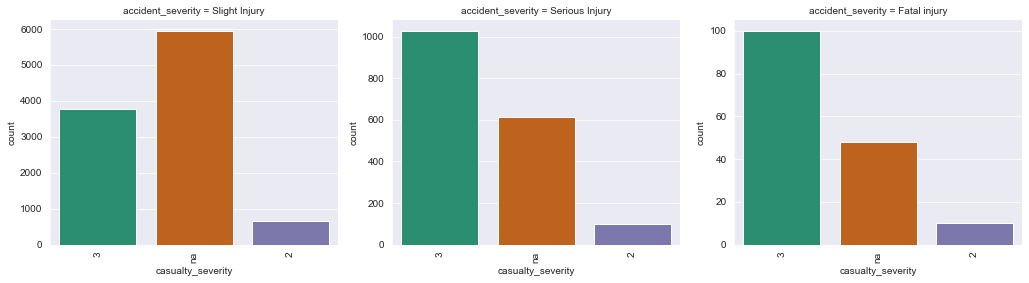

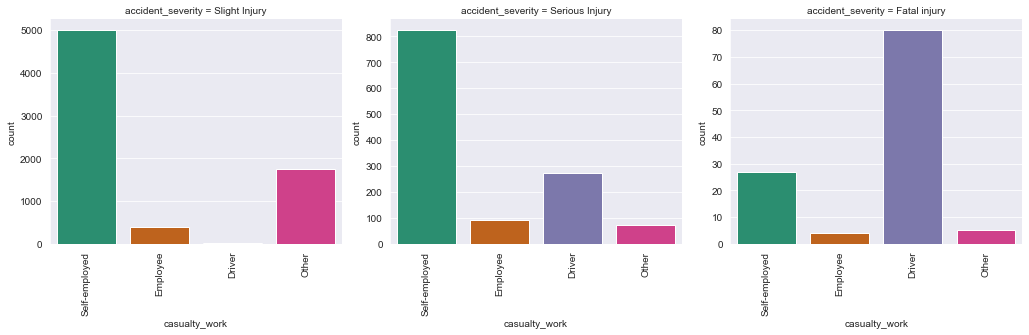

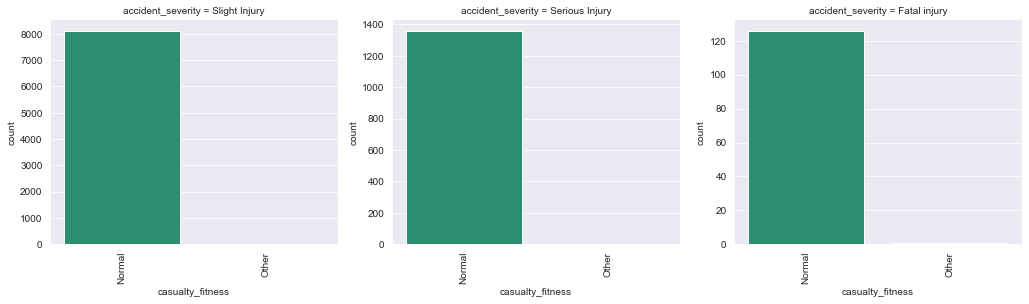

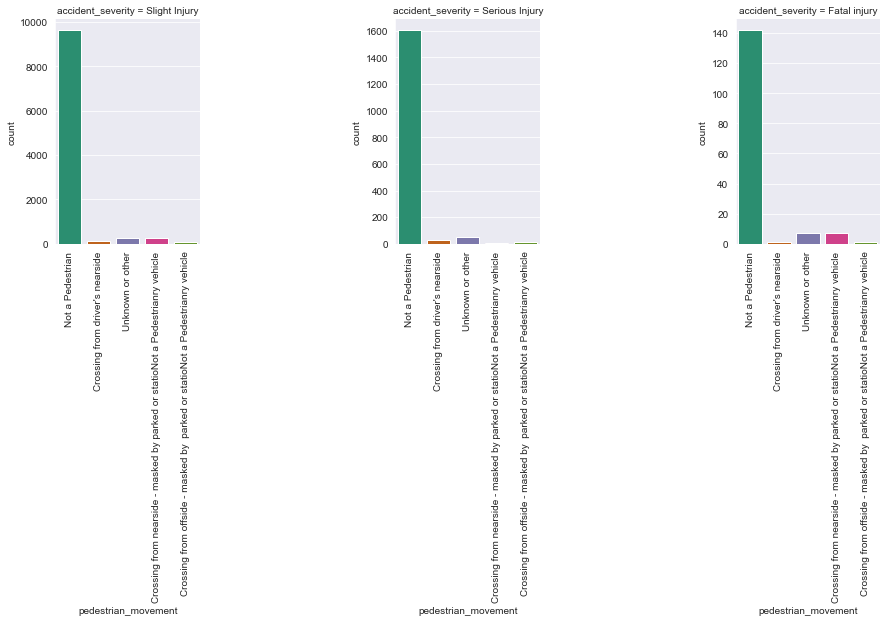

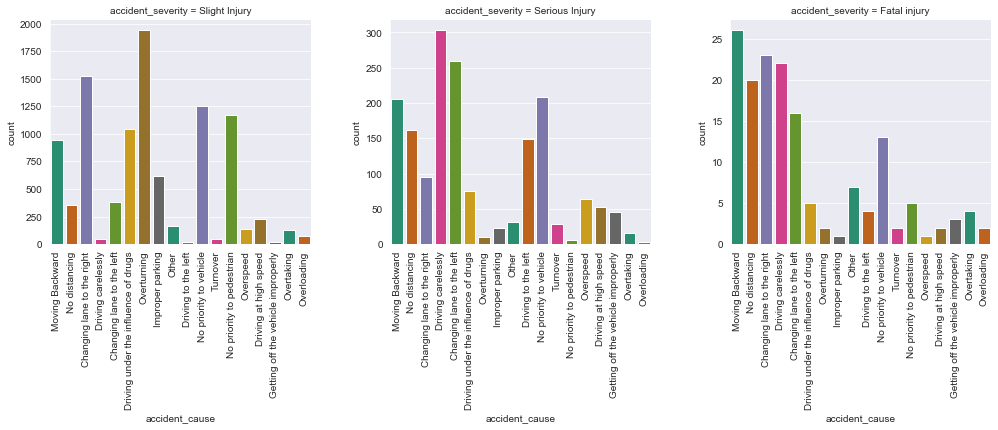

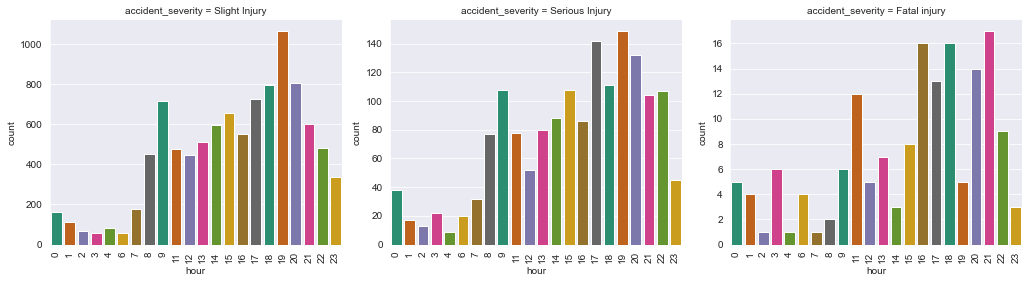

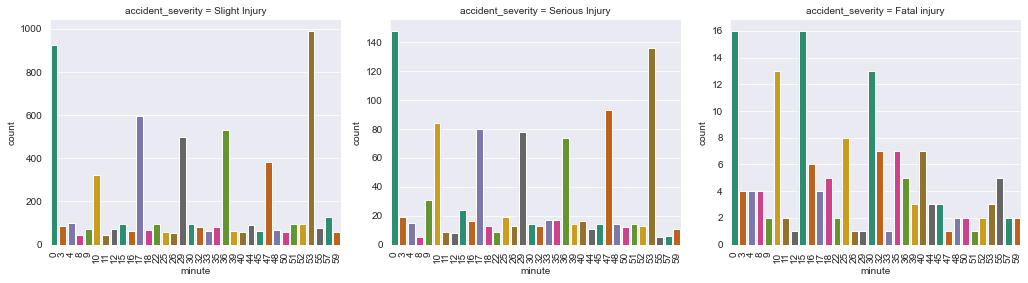

In [333]:
# Analysing the countplot of features across accident severity
for col in df.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df, col='accident_severity', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    sns.FacetGrid.set_xticklabels(g,rotation=90)
    plt.show()

#### Observations

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours
* 50% happened between 10 AM to 6 PM
* happened with personally owned passenger vehicles
* 3 PM to 7 PM has higher number of accidents with max at 5 PM

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

Majority of Slight injuries occured/caused

* majorly on weekdays 
* With driver age between 31-51 and over 51
* educated high school people
* with automobile drivers
* in school and church areas
* 2 way and double carriage lanes
* collision with road side objects
* involved 2 casualties
* while reversing
* have caused damage to both driver/rider and pedestrians
* changing lane to the right and overturning
* 9 AM and between 5 PM to 9 PM

Majority of Serious injuries occurred/caused

* majorly on weekdays 
* With driver age between 31-51 and over 51
* educated junior high school people
* with lorry drivers
* in Residential areas
* 2 way and other lanes
* vehicle to vehicle collision
* involved 2 casualties
* while reversing
* have caused damage to both driver/rider and pedestrians
* driving carelessly and changing lane to the left
* 9 AM and between 5 PM to 10 PM

Majority of Fatal injuries Severity
* on weekends
* with driver age 18-31 years
* with automobile drivers
* in Residential and office areas
* divided and undivided 2 way lanes
* darkness light lit conditions have shown increase in fatal injuries than other severity categories
* vehicle with vehicle, road side objects and pedestrians
* involved 2 and 4 casualties
* while going straight
* have caused damage to driver or rider
* moving backward, driving carelessly and changing lane to the left
* 11 AM, 4-6 PM, 8-10 PM

In [334]:
minutes = list(range(5,56,5))
def convert_minutes(x: int):
    for m in minutes:
        if x % m == x and x> m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in minutes+[0]:
            return x

In [335]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

<AxesSubplot:xlabel='count', ylabel='minute'>

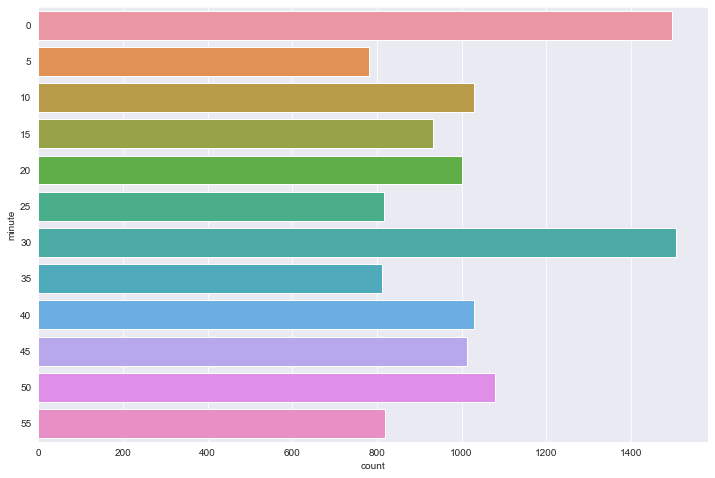

In [336]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='minute')

In [337]:
# dropping minutes
df.drop('minute', axis=1, inplace=True)

In [338]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols].head()

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [339]:
# rearranging columns
cols = ['hour', 'day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity']
df = df[cols]

# Preprocessing

In [340]:
# Getting the null value columns
df.isna().sum()[df.isna().sum() !=0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

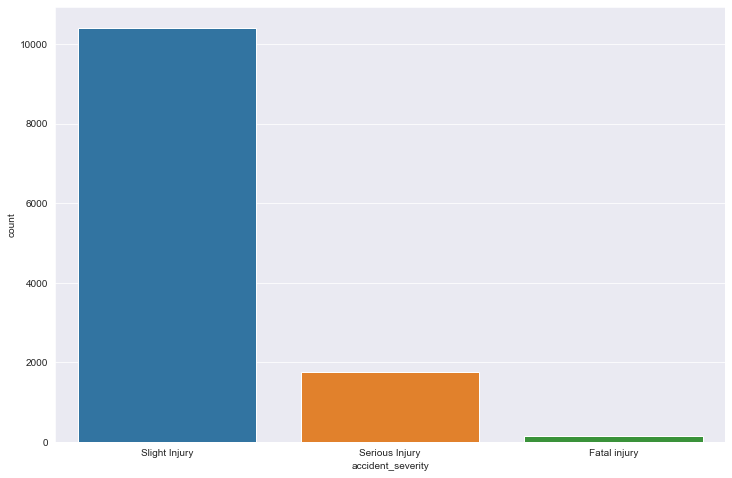

In [341]:
plt.figure(figsize=(12,8))
countplot = sns.countplot(x=df['accident_severity'])
plt.show()

In [342]:
# dropping columns that can cause imbalance while imputation
df.drop(columns=['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], axis=1, inplace=True)

In [343]:
#imputing columns with null values
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feature in impute_cols:
               mode = df[feature].mode()[0]
               df[feature].fillna(mode, inplace=True)

In [344]:
# All the null value columns have been imputed
df.isna().sum()

hour                       0
day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
dtype: int64

# Encoding

In [345]:
# Performing label encoding manually for the given features
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 28)

In [346]:
df.head()

,hour,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity
0,17,1,0,1,0,0,0,3,3,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,5,9,Slight Injury
1,17,1,1,1,4,3,11,3,2,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,5,16,Slight Injury
2,17,1,0,1,4,0,5,3,5,1,6,5,1,0,0,3,2,2,1,1,2,0,1,1,2,5,0,Serious Injury
3,1,3,0,1,4,2,11,0,5,6,6,6,7,2,0,0,2,8,1,1,2,2,0,0,2,5,1,Slight Injury
4,1,3,0,1,4,1,0,3,2,4,6,5,7,0,0,0,2,8,1,1,2,3,2,5,3,5,16,Slight Injury


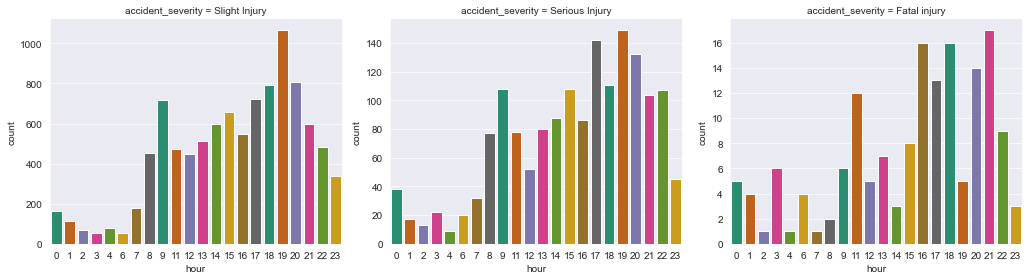

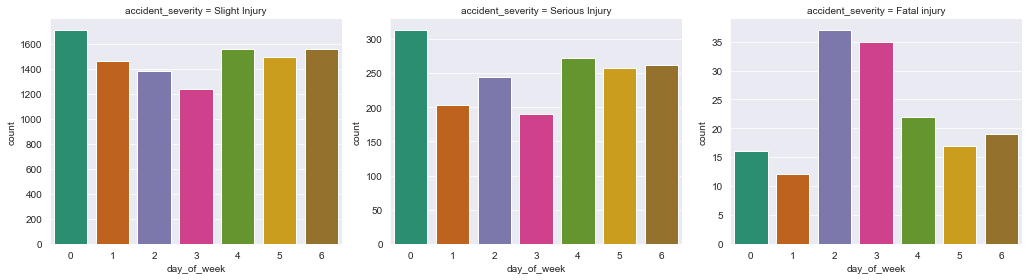

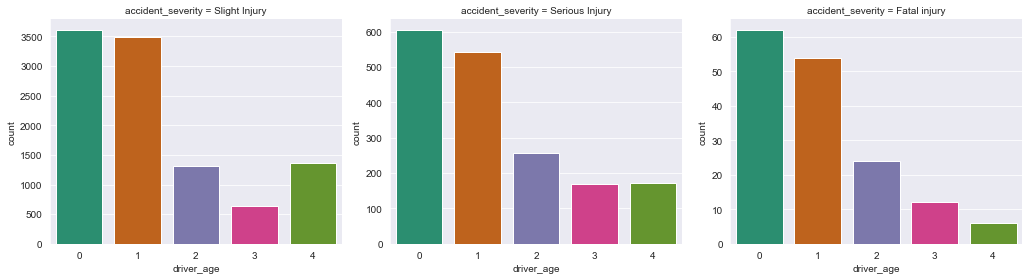

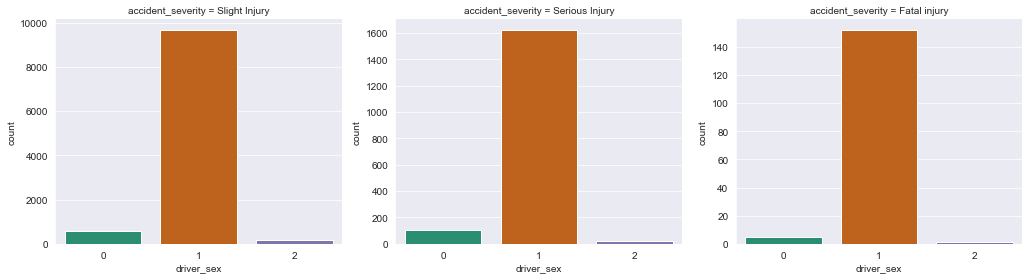

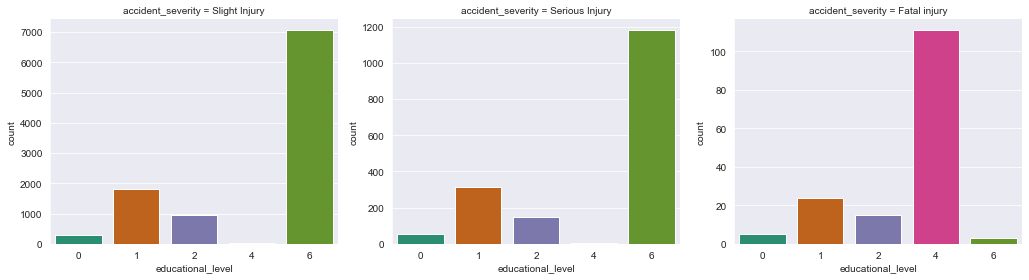

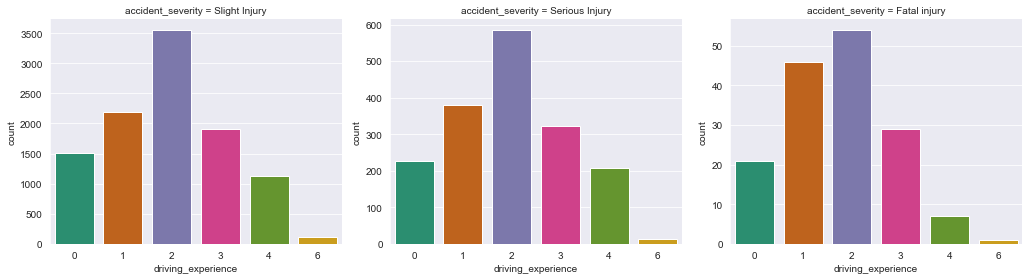

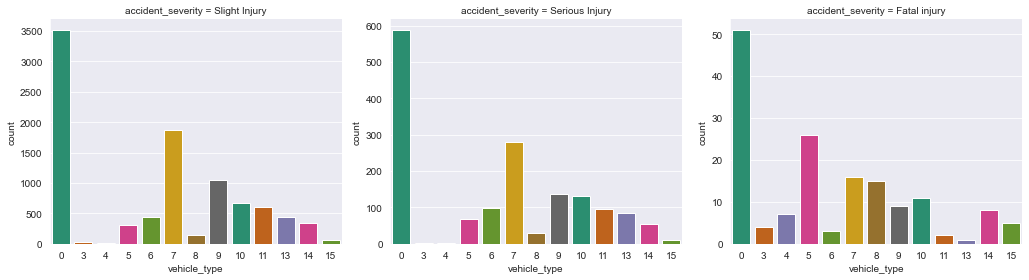

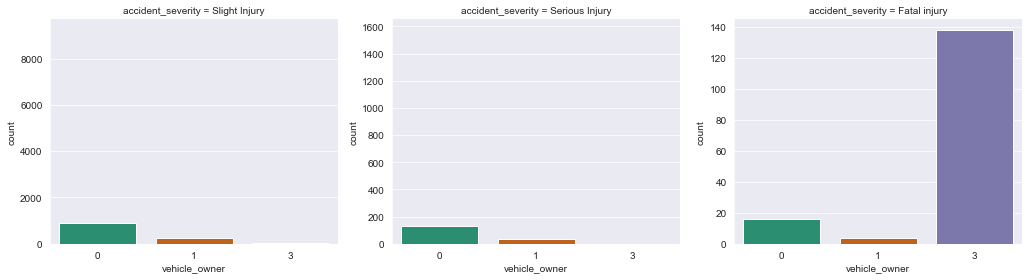

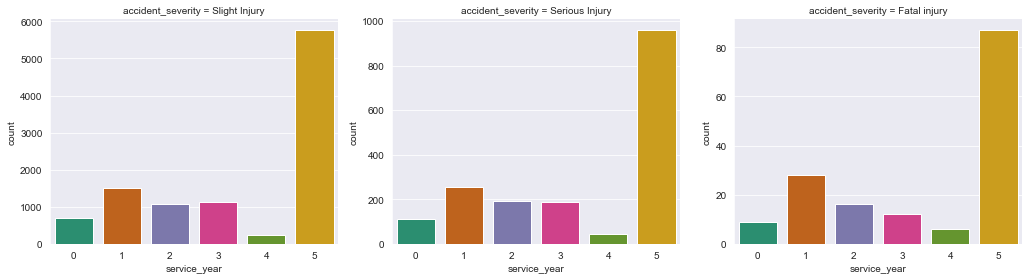

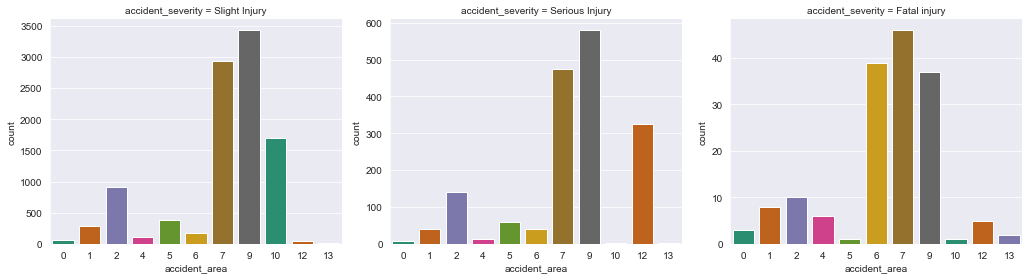

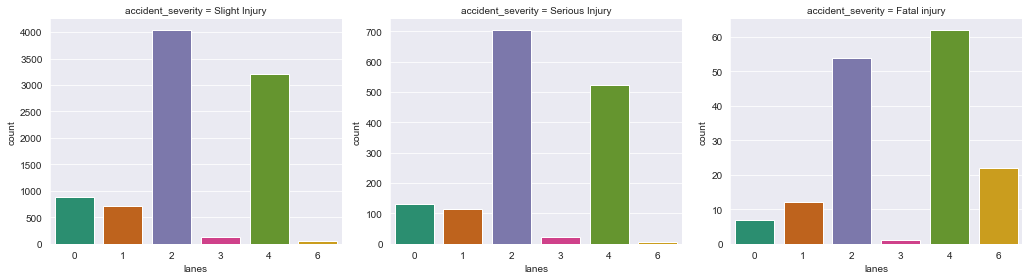

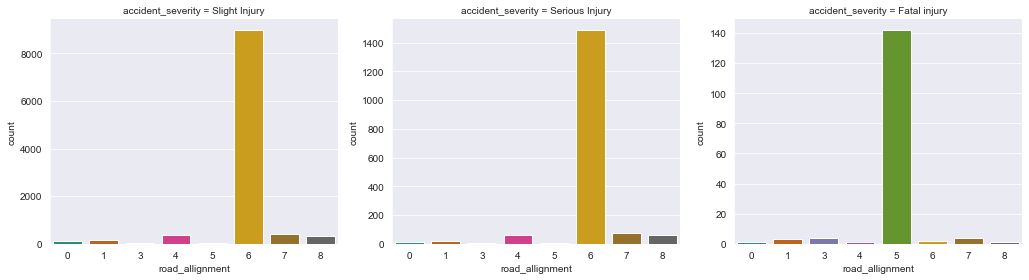

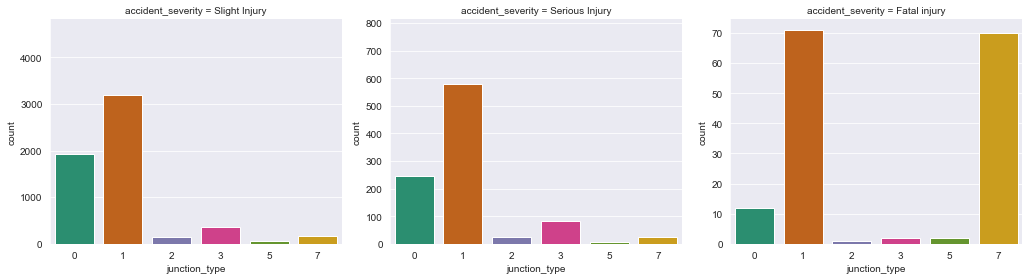

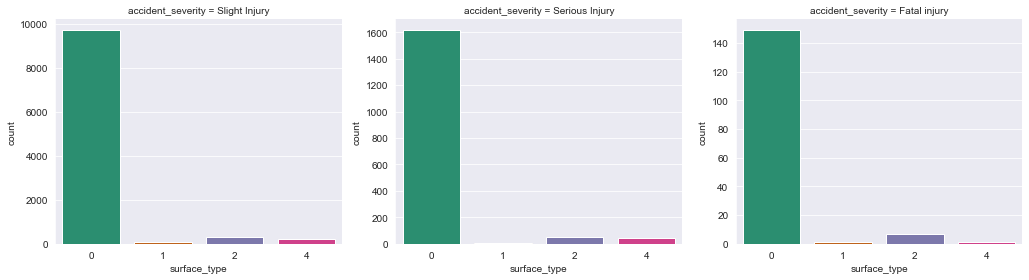

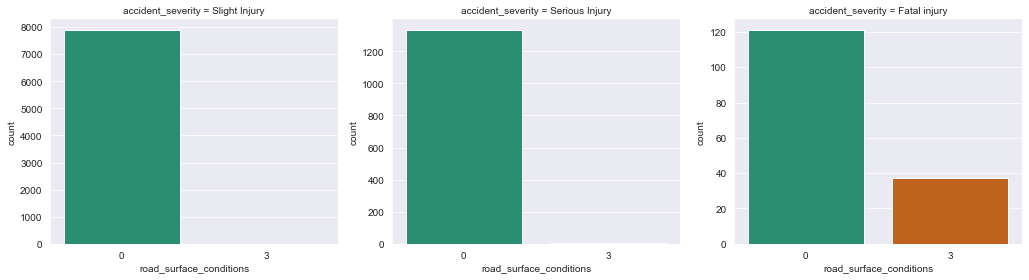

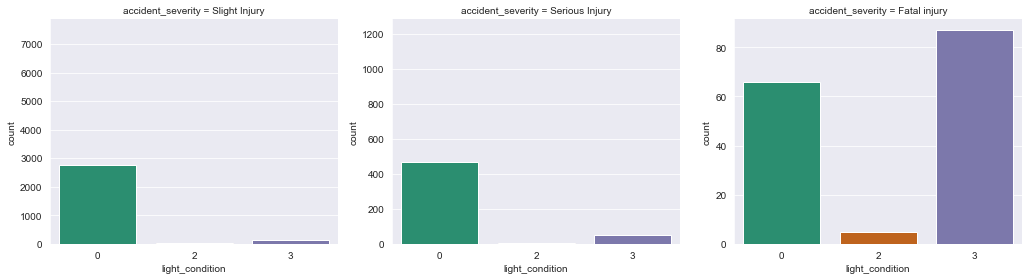

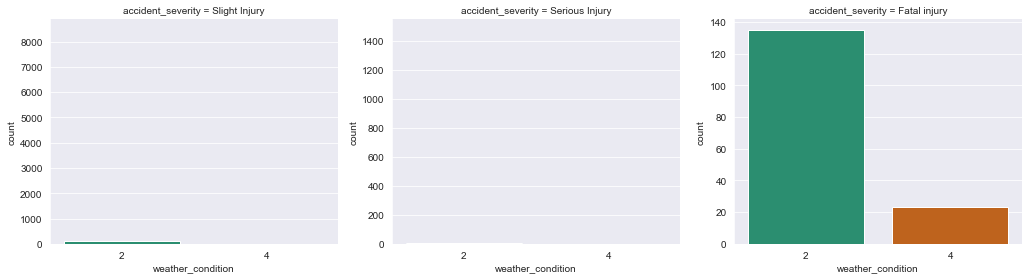

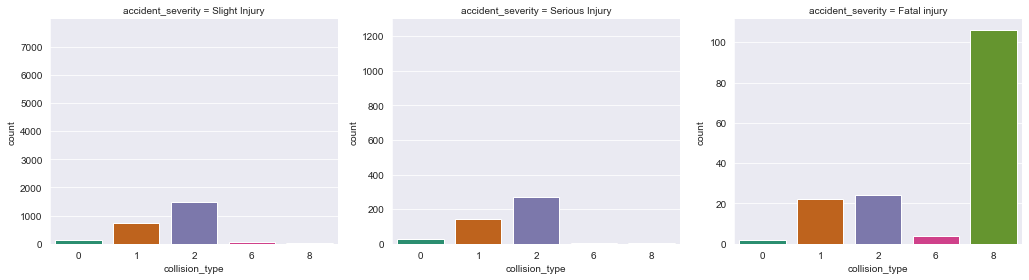

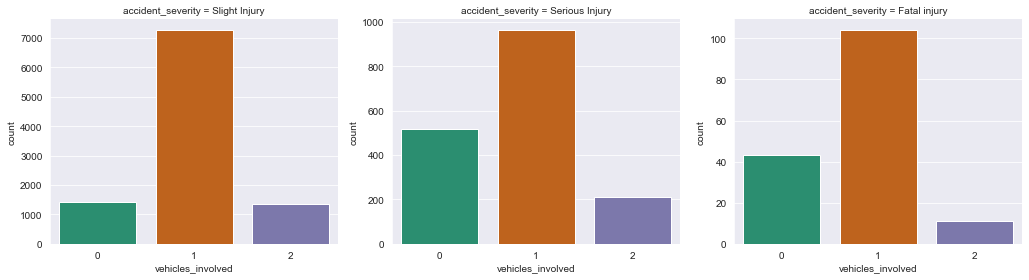

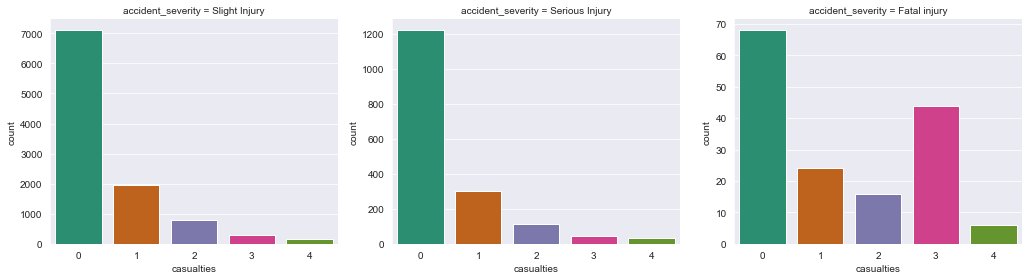

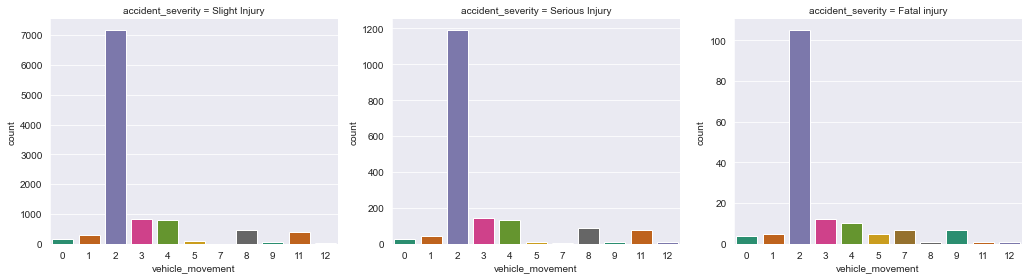

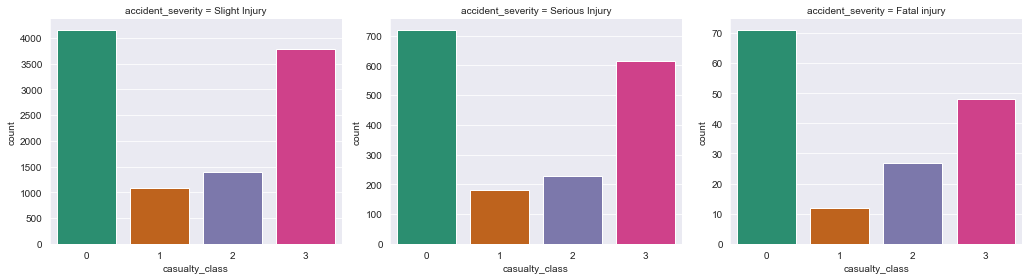

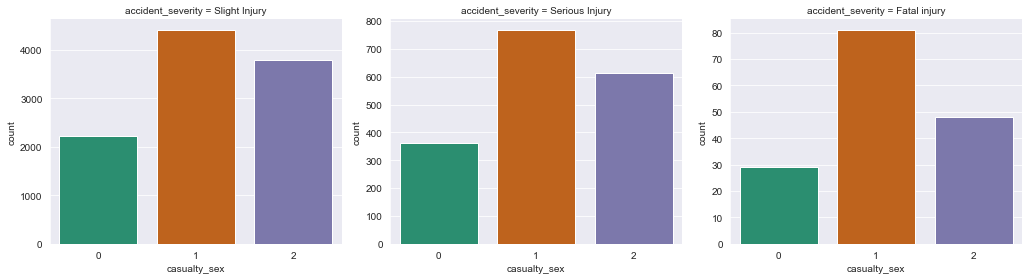

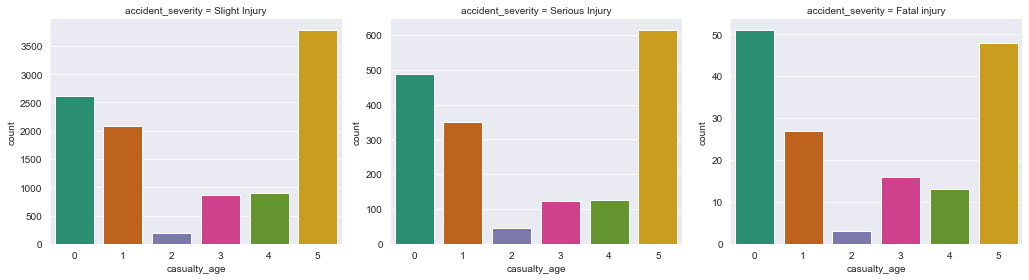

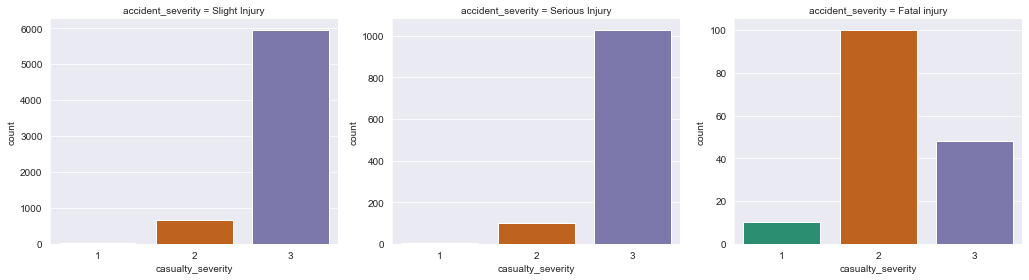

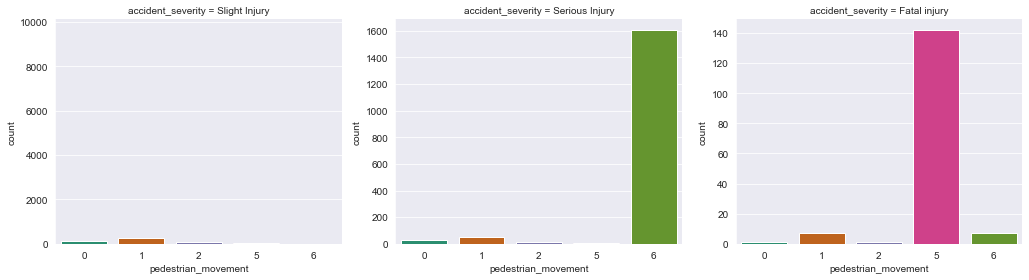

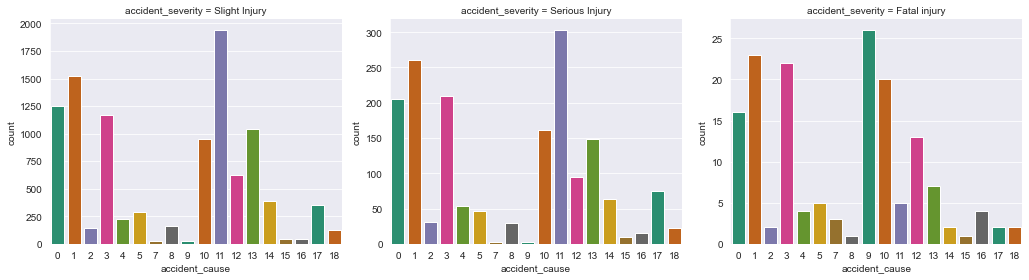

In [347]:
# Analysing the countplot of features across accident severity
for col in df.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df, col='accident_severity', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

<AxesSubplot:>

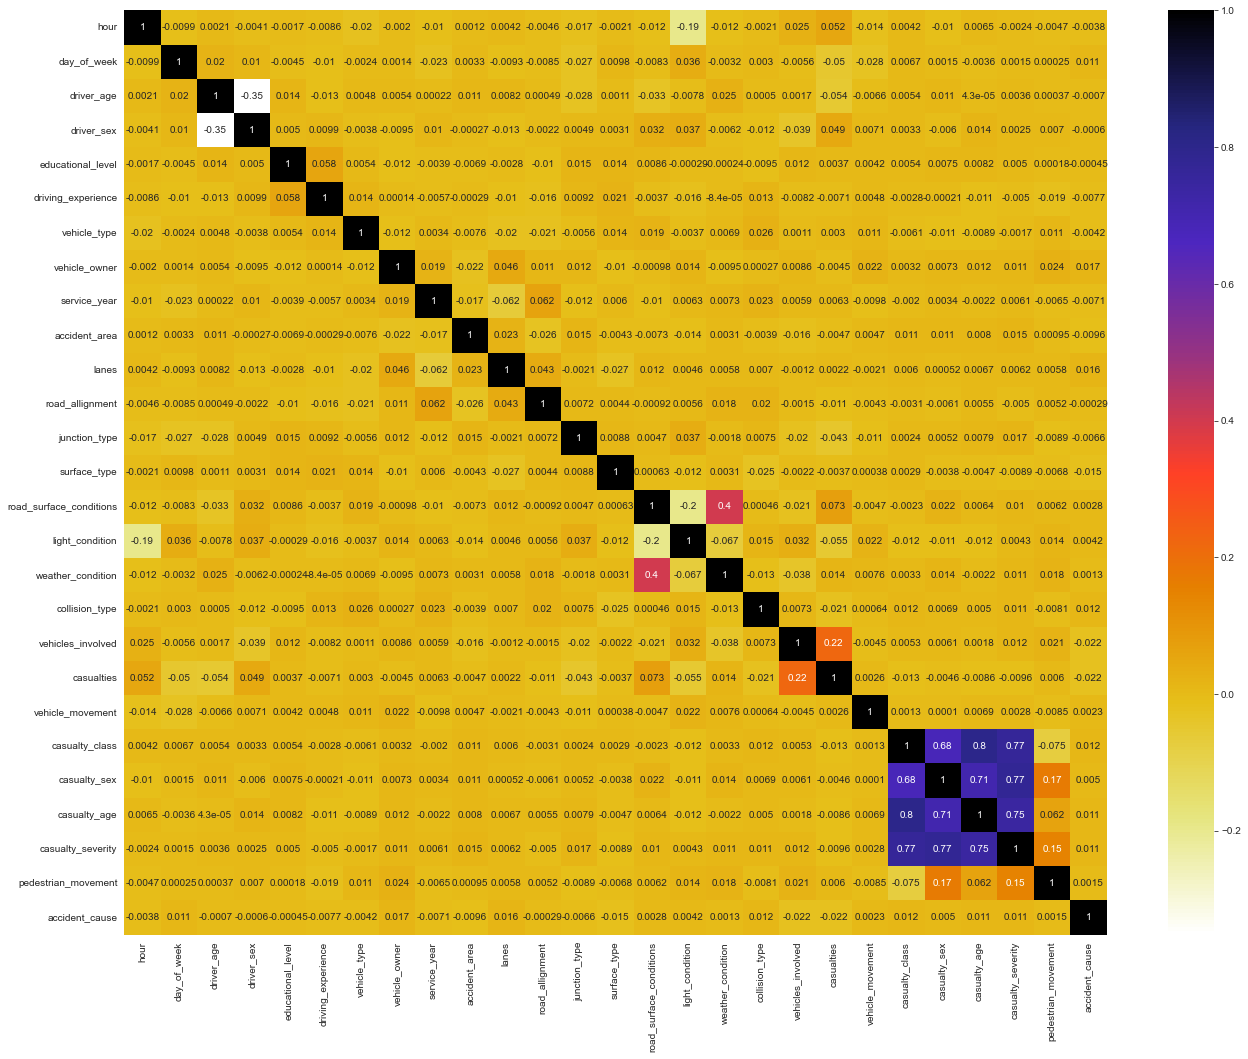

In [348]:
plt.figure(figsize=(22,17))
sns.heatmap(df.corr(),annot=True, cmap=plt.cm.CMRmap_r)

* High correlation exists between Casualty class, casualty sex, casualty age and casualty severity

## Upsampling

In [349]:
# upsampling using smote for handling the target variable class imbalance
X = df.drop('accident_severity', axis=1)
Y = df['accident_severity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


In [350]:
counter = Counter(Y_train)

print("=============================")

for value,count in counter.items():
    percentage = 100*count/len(Y_train)
    print(f"Class= {value}, n={count} ({percentage:.2f}%)")

oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

counter = Counter(Y_train)

print("=============================")

for value,count in counter.items():
    percentage = 100*count/len(Y_train)
    print(f"Class= {value}, n={count} ({percentage:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, Y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 27) (21972,)


# Encoding the target variable in train and test
Y_test = ordinal_encoder(pd.DataFrame(Y_test, columns = ['accident_severity']), pd.DataFrame(Y_test, columns = ['accident_severity']).columns)['accident_severity']
Y_train = ordinal_encoder(pd.DataFrame(Y_train, columns = ['accident_severity']), pd.DataFrame(Y_train, columns = ['accident_severity']).columns)['accident_severity']

In [289]:
Y_test.head()

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
Name: accident_severity, dtype: object

In [290]:
Y_train.head()

0     Slight Injury
1    Serious Injury
2    Serious Injury
3     Slight Injury
4    Serious Injury
Name: accident_severity, dtype: object

# Baseline Modeling

In [216]:
def modelling(X_train, Y_train, X_test, Y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train, Y_train)
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb'] = [accuracy_score(Y_test,y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(Y_test, y_pred)
        model_performance(xgb, Y_test, y_pred)
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, Y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(Y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)
        model_performance(xgb, Y_test, y_pred)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, Y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(Y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        model_performance(xgb, Y_test, y_pred)
        
    return scores

In [217]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

def model_performance(model, Y_test, y_pred):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test,y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    # Performance Metrics
    Accuracy = accuracy_score(Y_test,y_pred)
    Precision = precision_score(Y_test,y_pred, average='weighted')
    Recall = recall_score(Y_test,y_pred, average='weighted')
    F1_score = f1_score(Y_test,y_pred, average='weighted')
    
    show_metrics = pd.DataFrame(data=[[Accuracy, Precision, Recall, F1_score]])
    show_metrics = show_metrics.T
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [218]:
modelling(X_train,Y_train, X_test, Y_test, xgb=True, rf=True, extree=True)

{'xgb': [0.7921515561569689],
 'rf': [0.7967523680649526],
 'extree': [0.8046008119079837]}

In [219]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

#### RF Model Tuning 1

In [54]:
param_grid_rfcl = {
    'max_depth': [4,5,7],
    'max_features': [2,3,5],
    'min_samples_leaf': [12,15,17],
    'min_samples_split': [30,50,70],
    'n_estimators': [50,100,150]
}

rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl= GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl,cv=5)

In [55]:
grid_search_rfcl.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 5, 7], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [12, 15, 17],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 100, 150]})

In [56]:
print(grid_search_rfcl.best_params_)

{'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 100}


In [57]:
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=15,
                       min_samples_split=30, random_state=1)

In [58]:
y_pred = best_grid_rfcl.predict(X_test)

In [59]:
Accuracy = accuracy_score(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred, average='weighted')
Recall = recall_score(Y_test,y_pred, average='weighted')
F1_score = f1_score(Y_test,y_pred, average='weighted')

In [60]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

 Accuracy: 0.6397834912043302
 Precision: 0.7533602501490703
 Recall: 0.6397834912043302
 F1_score: 0.6863933993385323


#### RF Model Tuning 2

In [61]:
param_grid_rfcl = {
    'max_depth': [7,9],
    'max_features': [2,3,5],
    'min_samples_leaf': [10,12],
    'min_samples_split': [30,40],
    'n_estimators': [100,500]
}

rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl= GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl,cv=5)

In [62]:
grid_search_rfcl.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 9], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [10, 12],
                         'min_samples_split': [30, 40],
                         'n_estimators': [100, 500]})

In [63]:
print(grid_search_rfcl.best_params_)

{'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 500}


In [64]:
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=9, max_features=5, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=500, random_state=1)

In [65]:
y_pred = best_grid_rfcl.predict(X_test)

In [66]:
Accuracy = accuracy_score(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred, average='weighted')
Recall = recall_score(Y_test,y_pred, average='weighted')
F1_score = f1_score(Y_test,y_pred, average='weighted')

In [67]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

 Accuracy: 0.6841677943166441
 Precision: 0.7539390404205346
 Recall: 0.6841677943166441
 F1_score: 0.7144602153234998


#### RF Model Tuning 3

In [75]:
param_grid_rfcl = {
    'max_depth': [7,9,11],
    'max_features': [4,5,6],
    'min_samples_leaf': [200,400],
    'min_samples_split': [600,1200],
    'n_estimators': [100,500]
}

rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl= GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl,cv=5)

In [76]:
grid_search_rfcl.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 9, 11], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [200, 400],
                         'min_samples_split': [600, 1200],
                         'n_estimators': [100, 500]})

In [63]:
print(grid_search_rfcl.best_params_)

{'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 500}


In [64]:
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=9, max_features=5, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=500, random_state=1)

In [65]:
y_pred = best_grid_rfcl.predict(X_test)

In [66]:
Accuracy = accuracy_score(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred, average='weighted')
Recall = recall_score(Y_test,y_pred, average='weighted')
F1_score = f1_score(Y_test,y_pred, average='weighted')

In [67]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

 Accuracy: 0.6841677943166441
 Precision: 0.7539390404205346
 Recall: 0.6841677943166441
 F1_score: 0.7144602153234998


#### Ada Boost with RF as base estimator

In [169]:
from sklearn.ensemble import AdaBoostClassifier
rf = RandomForestClassifier()
ADB_model=AdaBoostClassifier(n_estimators=3000,random_state=1,base_estimator=rf,learning_rate=0.5)

In [170]:
ADB_model.fit(X_train,Y_train)
y_pred = ADB_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
Accuracy = accuracy_score(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred, average='weighted')
Recall = recall_score(Y_test,y_pred, average='weighted')
F1_score = f1_score(Y_test,y_pred, average='weighted')

In [ ]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

#### Basline RF Model

In [351]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [352]:
y_pred = rf.predict(X_test)

In [353]:
Accuracy = accuracy_score(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred, average='weighted')
Recall = recall_score(Y_test,y_pred, average='weighted')
F1_score = f1_score(Y_test,y_pred, average='weighted')

In [354]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

 Accuracy: 0.7924221921515562
 Precision: 0.752999279101908
 Recall: 0.7924221921515562
 F1_score: 0.769944497425601


In [355]:
rf.feature_importances_

array([0.07935451, 0.06321632, 0.05177374, 0.00916063, 0.03294853,
       0.04697044, 0.05961502, 0.01436047, 0.03741001, 0.04968955,
       0.04547723, 0.01683712, 0.04679039, 0.00915509, 0.03450309,
       0.04357004, 0.01781697, 0.03259636, 0.05640775, 0.04687632,
       0.03413025, 0.02328562, 0.02129188, 0.03094126, 0.01576733,
       0.00992056, 0.07013352])

<AxesSubplot:xlabel='Importance', ylabel='Features'>

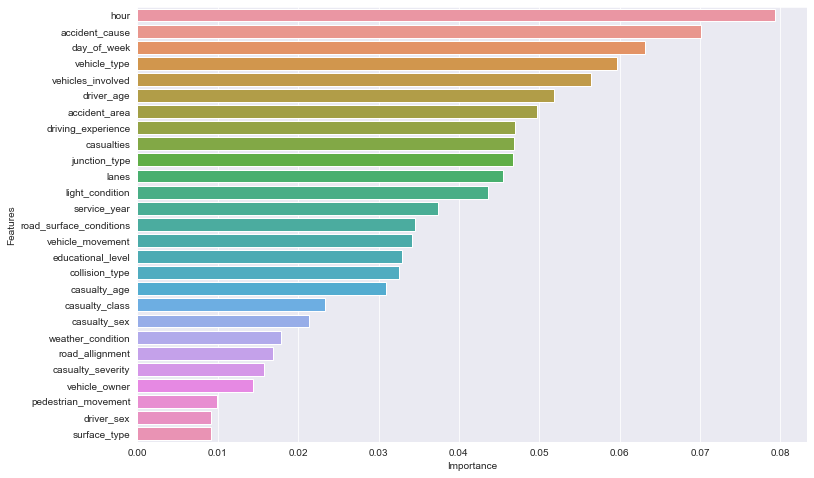

In [356]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = rf.feature_importances_
plt.figure(figsize=(12,8))
sns.barplot(data=df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance')

In [357]:
# selecting top 10 features
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['hour',
 'accident_cause',
 'day_of_week',
 'vehicle_type',
 'vehicles_involved',
 'driver_age',
 'accident_area',
 'driving_experience',
 'casualties',
 'junction_type']

In [358]:
df_top10 = df[top10]
df_top10

,hour,accident_cause,day_of_week,vehicle_type,vehicles_involved,driver_age,accident_area,driving_experience,casualties,junction_type
0,17,9,1,0,1,0,9,0,1,1
1,17,16,1,11,1,1,6,3,1,1
2,17,0,1,5,1,0,1,0,1,1
3,1,1,3,11,1,0,6,2,1,7
4,1,16,3,0,1,0,4,1,1,7
...,...,...,...,...,...,...,...,...,...,...
12311,16,10,6,4,1,1,5,1,0,1
12312,18,10,3,0,1,4,5,2,0,1
12313,13,1,3,1,0,2,5,2,0,1
12314,13,5,3,5,1,0,6,3,0,1


In [359]:
X = df_top10.copy()
X_train, X_test, Y_train, Y_test = train_test_split(df_top10, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8621, 10) (3695, 10) (8621,) (3695,)


In [ ]:
rf.fit(X_train, Y_train)

In [ ]:
y_pred = rf.predict(X_test)

Accuracy = accuracy_score(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred, average='weighted')
Recall = recall_score(Y_test,y_pred, average='weighted')
F1_score = f1_score(Y_test,y_pred, average='weighted')

In [ ]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

In [ ]:
y_pred

## We can see that random forest model gave us the best overall metrics. For now lets proceed with this model for deployment

In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'Baseline_RandomForest_final.joblib')

In [237]:
import sys

print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [246]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.20.3
1.3.4
1.1.1
